# Project 1: Customer Database
**This is the first of three mandatory projects to be handed in as part of the assessment for the course 02807 Computational Tools for Data Science at Technical University of Denmark, autumn 2019.**

#### Practical info
- **The project is to be done in groups of at most 3 students**
- **Each group has to hand in _one_ Jupyter notebook (this notebook) with their solution**
- **The hand-in of the notebook is due 2019-10-13, 23:59 on DTU Inside**

#### Your solution
- **Your solution should be in Python**
- **For each question you may use as many cells for your solution as you like**
- **You should document your solution and explain the choices you've made (for example by using multiple cells and use Markdown to assist the reader of the notebook)**
- **You should not remove the problem statements, and you should not modify the structure of the notebook**
- **Your notebook should be runnable, i.e., clicking [>>] in Jupyter should generate the result that you want to be assessed**
- **You are not expected to use machine learning to solve any of the exercises**
- **You will be assessed according to correctness and readability of your code, choice of solution, choice of tools and libraries, and documentation of your solution**

## Introduction
Your team has been hired by the company X as data scientists. X makes gadgets for a wide range of industrial and commercial clients.

As in-house data scientists, your teams first task, as per request from your new boss, is to optimize business operations. You have decided that a good first step would be to analyze the companys historical sales data to gain a better understanding of where profit is coming from. It may also reveal some low hanging fruit in terms of business opportunities.

To get started, you have called the IT department to get access to the customer and sales transactions database. To your horror you've been told that such a database doens't exist, and the only record of sales transactions is kept by John from finance in an Excel spreadsheet. So you've emailed John asking for a CSV dump of the spreadsheet...

In this project you need to clean the data you got from John, enrich it with further data, prepare a database for the data, and do some data analysis. The project is comprised of five parts. They are intended to be solved in the order they appear, but it is highly recommended that you read through all of them and devise an overall strategy before you start implementing anything.

## Part 1: Cleaning the data
John has emailed you the following link to the CSV dump you requested.

- [transactions.csv](https://raw.githubusercontent.com/patrickcording/02807-comp-tools/master/docker/work/data/transactions.csv)

It seems as though he has been a bit sloppy when keeping the records. 

In this part you should:
- Explain what the data is
- Clean it to prepare it for inserting into a database and doing data analysis 

---
### Solution

We start by loading and visualizing first and last rows, indexes and our columns headers.

Our dataframe is 20568 row per 6 columns.

The company has sold 100 different parts to 35 companies in 13 countries, 30 cities.

The data was collected from 2016-01-02 to 2019-05-14.


In [1]:
!rm transactions*
!wget  https://gist.githubusercontent.com/zacharyneveu/b139085a531a05acf0fb66e0a614f24e/raw/f6e4cf82bbc1da2e02e871e7d2319bc7d4af41ec/transactions.csv

--2019-10-11 21:23:58--  https://gist.githubusercontent.com/zacharyneveu/b139085a531a05acf0fb66e0a614f24e/raw/f6e4cf82bbc1da2e02e871e7d2319bc7d4af41ec/transactions.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 199.232.40.133
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|199.232.40.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1350495 (1.3M) [text/plain]
Saving to: ‘transactions.csv’

transactions.csv    100%[===================>]   1.29M  --.-KB/s    in 0.03s   

2019-10-11 21:23:58 (48.5 MB/s) - ‘transactions.csv’ saved [1350495/1350495]



In [98]:
import sqlite3

In [99]:
# Importing the necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-notebook')
import random
df = pd.read_csv('transactions.csv')
df.head(5)


,part,company,country,city,price,date
0,54868-5165,Chatterbridge,Spain,Barcelona,784.79€,2016-01-02 00:01:05
1,60505-2867,Lajo,Greece,Thessaloniki,187.99€,2016-01-02 00:05:26
2,24385-268,Flipstorm,Greece,Athens,221.73€,2016-01-02 00:18:30
3,76117-001,Twitterbeat,France,Annecy,1075.82€,2016-01-02 02:32:30
4,44946-1046,Chatterbridge,Spain,Barcelona,412.55€,2016-01-02 04:51:55


In [100]:
df.index

RangeIndex(start=0, stop=20568, step=1)

In [101]:
df.columns

Index(['part', 'company', 'country', 'city', 'price', 'date'], dtype='object')

In [102]:
print (min(df['date']))
print (max(df['date']))

10/04/2017
2019-05-14 22:48:39


In [103]:
df.describe()

,part,company,country,city,price,date
count,20558,20568,18397,20535,20567,20568
unique,101,35,13,30,19214,20552
top,17156-617,Thoughtmix,Portugal,Amadora\t,-,10/04/2017
freq,300,2795,7383,2787,5,7


A bit more insight, lets group our data by country and company.

In [104]:
df_country_city = df.groupby(['country', 'company']) 
df_country_city.first()

part          city      price  \
country        company                                              
France         Avaveo          70253-307          Nice   1029.92€   
               Eimbee          49349-106        Amiens    789.66€   
               Flipstorm      44946-1046      Nanterre     406.4€   
               Gabtune         49967-724          Lyon    543.67€   
               Gevee           0699-7041   Champagnole    998.89€   
               Rhycero         55700-014       Arcueil    635.89€   
               Twitterbeat     76117-001        Annecy   1075.82€   
               Voomm           52125-444         Paris    266.62€   
Germany        Buzzbean        43419-018    Düsseldorf    103.45€   
Greece         Flipstorm       24385-268        Athens    221.73€   
               Laj0            54123-957  Thessaloniki    189.29€   
               Lajo           60505-2867  Thessaloniki    187.99€   
               Riffpath        50563-113     Heraklion    489.98€   
               Yozio           36800-952        Patras    386.76€   
Japan          Bubblemix       16714-295         Asaka  ¥47774.49   
               Kanoodle       24286-1562       Niihama  ¥32441.68   
Netherlands    Innojam         0268-1604     Amsterdam    157.22€   
               Teklist         76454-100        Arnhem    166.29€   
Portuga        Brainsphere    36987-1697         Braga     859.1€   
               Ntags          62742-4030        Lisbon    519.35€   
               Thoughtmix      49738-105     Amadora\t    406.09€   
Portugal       Brainsphere    36987-1697         Braga    830.75€   
               Gabcube         50563-113        Almada    671.22€   
               Ntags           62756-707        Lisbon    322.45€   
               Ntagz           68084-172        Lisbon    670.96€   
               Realpoint       24385-268        Lisbon    200.28€   
               Roodel         10267-2529       Aranhas    460.71€   
               Shufflebeat     52343-025         Porto    843.78€   
               Thoughtmix      0268-6107     Amadora\t    477.71€   
               Thoughtmixz     49738-105     Amadora\t    506.82€   
Spain          Chatterbridge  54868-5165     Barcelona    784.79€   
Switzerland    Tagtune         67046-030        Zürich     158.2€   
Tyskland       Buzzbean       55856-0003    Düsseldorf     641.6€   
US             Zoonder         42254-213        Boston    $219.25   
United Kingdom Zooxo           54092-515        London    £704.94   
               Zooxo.          35356-325        London     £32.84   
United States   -              17156-617        Boston   $1168.82   
                a              37205-992      New York     $395.3   
               Wordify        62670-4404      New York    $444.15   
               Zoonder         54473-578        Boston    $199.56   
               aa              51346-145      New York   $1059.38   

                                             date  
country        company                             
France         Avaveo         2016-01-03 11:53:31  
               Eimbee         2016-01-06 21:02:40  
               Flipstorm      2016-01-02 16:34:14  
               Gabtune        2016-01-30 16:06:44  
               Gevee          2016-02-22 11:20:00  
               Rhycero        2016-01-12 22:29:15  
               Twitterbeat    2016-01-02 02:32:30  
               Voomm          2016-01-02 07:40:37  
Germany        Buzzbean       2016-01-02 08:57:57  
Greece         Flipstorm      2016-01-02 00:18:30  
               Laj0           2017-10-24 06:22:42  
               Lajo           2016-01-02 00:05:26  
               Riffpath       2016-01-06 04:05:10  
               Yozio          2016-01-07 01:49:15  
Japan          Bubblemix      2016-02-12 16:30:46  
               Kanoodle       2016-01-04 14:48:42  
Netherlands    Innojam        2016-01-03 13:48:28  
               Teklist        2016-01-03 09:35:27  
Portuga        Brainsphere  

We definitely want to check on the data type of the columns.

We can already see:
- Some date are not fitting the calendar month.
- There are different currencies: £,$,£,¥
- Some entries are miss-spelled.
    - countries: "Portugal" and "Portuga" -> should be merged
    - companies: "Zooxo" and "Zooxo." -> should be merged
    ect
- Some entries are missing or Nan.

### 1 - Fix the dates
Lets have a look for example at entry 3539. Something is weird:eg  there is no 32nd of June. 

In [105]:
df.iloc[3539]

part                 17156-617
company             Thoughtmix
country               Portugal
city                 Amadora\t
price                  791.86€
date       2016-06-32 07:22:28
Name: 3539, dtype: object

We can decide to ignore date errors or return an empty value in case if an error. 
What we want to do is to convert those dates as NaT.

In [106]:
df['date']= pd.to_datetime(df['date'],format='%Y-%m-%d', errors='coerce')
df['date'].head(5)

0   2016-01-02 00:01:05
1   2016-01-02 00:05:26
2   2016-01-02 00:18:30
3   2016-01-02 02:32:30
4   2016-01-02 04:51:55
Name: date, dtype: datetime64[ns]

We can decide to drop the info about time and keep the date only.
We can do that with two different formats:

In [107]:
df['norm_date'] = df['date'].dt.normalize()
df['norm_date'].head(5)

0   2016-01-02
1   2016-01-02
2   2016-01-02
3   2016-01-02
4   2016-01-02
Name: norm_date, dtype: datetime64[ns]

In [108]:
df['just_date'] = df['date'].dt.date
df['just_date'].head(5)


0    2016-01-02
1    2016-01-02
2    2016-01-02
3    2016-01-02
4    2016-01-02
Name: just_date, dtype: object

In [109]:
df['year'] = df['date'].dt.year

In [110]:
print ('Number of wrong dates: ',len(df[df['date'].isnull()]))
print (df[df['date'].isnull()])

Number of wrong dates:  18
             part        company        country        city     price date  \
3539    17156-617     Thoughtmix       Portugal   Amadora\t   791.86€  NaT   
3540   54868-5165    Shufflebeat       Portugal       Porto   525.24€  NaT   
9295    52343-025     Thoughtmix       Portugal   Amadora\t   662.06€  NaT   
9296    49738-105  Chatterbridge          Spain   Barcelona   442.31€  NaT   
9328    0615-7679     Thoughtmix       Portugal   Amadora\t   314.43€  NaT   
9329    35356-325        Wordify  United States    New York   $330.75  NaT   
9330    0268-1401     Thoughtmix       Portugal   Amadora\t  1000.77€  NaT   
9331    51138-049    Twitterbeat         France      Annecy  1032.04€  NaT   
9332    68233-011    Brainsphere       Portugal       Braga   588.07€  NaT   
9333    54473-578    Shufflebeat       Portugal       Porto   192.34€  NaT   
9334   54868-0823        Rhycero         France     Arcueil   108.62€  NaT   
19162  63629-2733       Buzzbean     

## 2- Fix the currencies

In [111]:
import re
import math

In [112]:
def price_to_numeric(price):
    try:
        if price in {'-', 'void', 'nan', 'na'}:
            price = float('nan')
        elif type(price) is str:
            price = float(re.search('[0-9\-]{1,}\.[0-9]{0,}', str(price))[0])
        elif math.isnan(price):
            pass
        return price
    except Exception as E:
        print(f'Failed for {price}')

In [113]:
df['currencies'] = [re.sub('[0-9\.\-]', '', str(i)) for i in df['price']]
df['price'] = [price_to_numeric(price) for price in df['price']]

### Convert Currency and Fill in Nans

In [114]:
import requests
import json

KEY = '526e1baa6d7670e0b9028561dcb56949'
endpoint = 'http://data.fixer.io/api/latest?access_key='


REAL_TIME = False
if REAL_TIME:
    page = requests.get(f'{endpoint}{KEY}')
    data = json.loads(page.content)
else:
    page = requests.get('https://gist.githubusercontent.com/zacharyneveu/ebdaa264109edc528e97870f3686b2c0/raw/cf86c535e93f30826d77e64951688e9294304a4a/rates.json')
    data = json.loads(page.content)
rates = data['rates']

data = json.loads(page.content)
rates = data['rates']

rates['GBP']

df['currencies'].value_counts()

cur_abbrevs = {'€': 'EUR', '£': 'GBP', '¥': 'JPY', '$': 'USD'}

df['cur_abbrevs'] = [cur_abbrevs[sym] if sym in cur_abbrevs.keys() else '' for sym in df['currencies']]

In [115]:
df['price_eur'] = [df['price'][i]/rates[df['cur_abbrevs'][i]] if df['cur_abbrevs'][i] != '' else 0 for i in range(df.shape[0])]

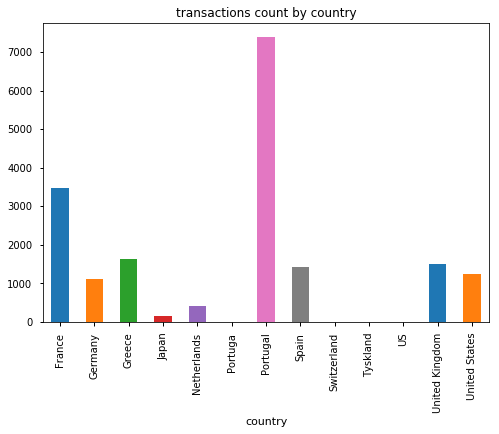

In [116]:
country_data = df.groupby('country')['price_eur'].count()
country_data.plot(kind='bar', title="transactions count by country")

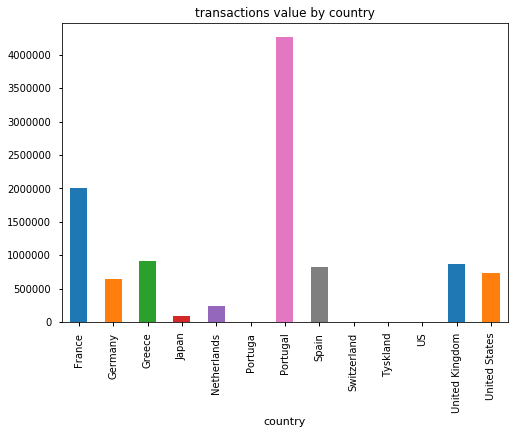

In [117]:
df.groupby('country')['price_eur'].sum().plot(kind='bar', title='transactions value by country')

## 3 - Checking on the missing values

In [118]:
for i in df.columns:
    if not df[df[i].isnull()].empty:
        print ()
        print (df[df[i].isnull()])
    else:
        print ()
        #print ('No missing values for %s' % df['i'] )


      part      company        country          city    price  \
14916  NaN        Yozio         Greece        Patras   518.38   
14917  NaN  Brainsphere       Portugal         Braga   957.24   
14918  NaN         Lajo         Greece  Thessaloniki   966.06   
14919  NaN       Roodel       Portugal       Aranhas   873.65   
17524  NaN        Yozio         Greece        Patras   627.32   
17525  NaN   Thoughtmix       Portugal     Amadora\t   825.80   
17526  NaN      Gabcube       Portugal        Almada   188.31   
17527  NaN     Buzzbean        Germany    Düsseldorf   429.67   
17528  NaN      Zoonder  United States        Boston   521.72   
17529  NaN  Twitterbeat         France        Annecy  1031.46   

                     date  norm_date   just_date    year currencies  \
14916 2018-02-17 21:43:43 2018-02-17  2018-02-17  2018.0          €   
14917 2018-02-17 22:12:24 2018-02-17  2018-02-17  2018.0          €   
14918 2018-02-17 22:54:49 2018-02-17  2018-02-17  2018.0          €   

For now we keep all the rows and we will decide how to deal with missing info later, depending on the kind of analysis that we will need to do.

## 4 - Fix the misspellings 

In [119]:
from difflib import get_close_matches

The function `fix_typos` is based around the idea that occurrences of individual typos are unlikely to be written the same way very often. This function finds all rare values in a column, and replaces them with similar but popular counterparts. In practice, this works well for correcting typos in the country, company, and city columns.

In [120]:
def fix_typos(col, min_thresh):
    """
    col: DataFrame column (Series) of strings to fix typos in
    min_thresh: Minimum count to determine that object is a typo
    """
    counts = col.value_counts()
    rare = [c for c in counts.keys() if counts[c] < min_thresh]
    common = [c for c in counts.keys() if counts[c] >= min_thresh]
    return [c if c in common else (get_close_matches(str(c), common) or [None])[0] for c in col]

In [121]:
for col in ['company', 'country', 'city']:
    df[col] = fix_typos(df[col], 10)

In [122]:
df.head()

,part,company,country,city,price,date,norm_date,just_date,year,currencies,cur_abbrevs,price_eur
0,54868-5165,Chatterbridge,Spain,Barcelona,784.79,2016-01-02 00:01:05,2016-01-02,2016-01-02,2016.0,€,EUR,784.79
1,60505-2867,Lajo,Greece,Thessaloniki,187.99,2016-01-02 00:05:26,2016-01-02,2016-01-02,2016.0,€,EUR,187.99
2,24385-268,Flipstorm,Greece,Athens,221.73,2016-01-02 00:18:30,2016-01-02,2016-01-02,2016.0,€,EUR,221.73
3,76117-001,Twitterbeat,France,Annecy,1075.82,2016-01-02 02:32:30,2016-01-02,2016-01-02,2016.0,€,EUR,1075.82
4,44946-1046,Chatterbridge,Spain,Barcelona,412.55,2016-01-02 04:51:55,2016-01-02,2016-01-02,2016.0,€,EUR,412.55


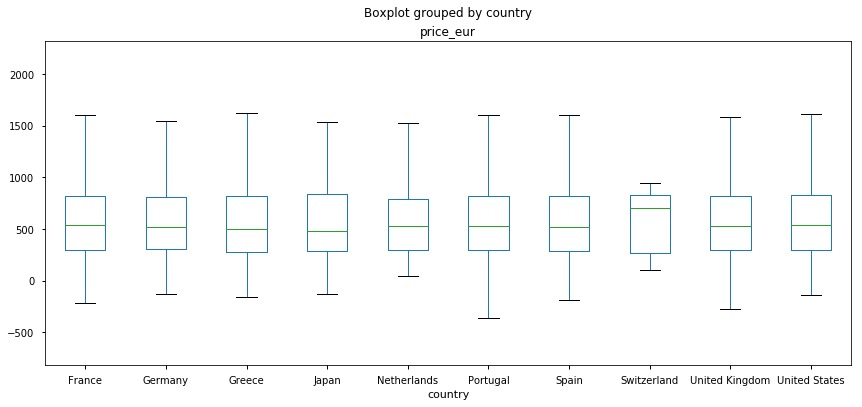

In [123]:
df.boxplot(column='price_eur', by='country', figsize=(14,6), grid=False)

---
## Part 2: Enriching the data

A common task for a data scientists is to combine or enrich data from internal sources with data available from external sources. The purpose of this can be either to fix issues with the data or to make it easier to derive insights from the data.

In this part you should enrich your data with data from at least one external source. You may look to part 4 for some  inspiration as to what is required. Your solution should be automated, i.e., you can not ask the reader of your notebook to download any data manually. You should argue why and what you expect to achieve by the enrichments you are doing.

In [124]:
from datetime import datetime, timedelta

In [127]:
def get_day_of_quarter(date):
    try:
        quarter = date.quarter
        qstart = datetime(date.year, 3*quarter - 2, 1)
        return int((date-qstart).days)
    except Exception as E:
        return None

In [128]:
df['day_of_quarter'] = [get_day_of_quarter(i) for i in df['date']]
df['quarter'] = [d.quarter for d in df['date']]

Create a first day of the month column as well. This seems super simple, but will be used to join the `transactions` and `stocks` tables in the database.

In [131]:
df['first_of_month'] = ["-".join(str(d).split('-')[:2]+['01'])for d in df.just_date]

In [188]:
df['first_of_month'] = [pd.datetime(d.year, d.month, 1) if type(d.year+d.month) is int else pd.NaT for d in df['just_date']]

In [189]:
df.head()

,part,company,country,city,price,date,norm_date,just_date,year,currencies,cur_abbrevs,price_eur,day_of_quarter,quarter,first_of_month
0,54868-5165,Chatterbridge,Spain,Barcelona,784.79,2016-01-02 00:01:05,2016-01-02,2016-01-02,2016.0,€,EUR,784.79,1.0,1.0,2016-01-01
1,60505-2867,Lajo,Greece,Thessaloniki,187.99,2016-01-02 00:05:26,2016-01-02,2016-01-02,2016.0,€,EUR,187.99,1.0,1.0,2016-01-01
2,24385-268,Flipstorm,Greece,Athens,221.73,2016-01-02 00:18:30,2016-01-02,2016-01-02,2016.0,€,EUR,221.73,1.0,1.0,2016-01-01
3,76117-001,Twitterbeat,France,Annecy,1075.82,2016-01-02 02:32:30,2016-01-02,2016-01-02,2016.0,€,EUR,1075.82,1.0,1.0,2016-01-01
4,44946-1046,Chatterbridge,Spain,Barcelona,412.55,2016-01-02 04:51:55,2016-01-02,2016-01-02,2016.0,€,EUR,412.55,1.0,1.0,2016-01-01


## Stock Data

Information about these companies is quite difficult to find. We tried to find many extermal sources of data and had many unsuccessful tries including
+ Google Trends (many companies didn't have any trend data)
+ Angel List (startup list website)
+ Company name to stock-symbol (most aren't public)
+ Twitter (most companies didn't have a public handle)

In the end we decided to just settle for more general market data. This can be useful when trying to spot trends in customer purchasing. If the whole market is down, it is understandable if customers aren't buying and doesn't say anything bad about the product quality. For this large-scale trend data, historical data from a large index is best. Turns out, APIs for this kind of data are rarely found for free, and we didn't find one with market indexes, only individual stocks. We managed to find an HTML table on a website with monthly data for the S&P 500 index, however, so we went ahead and scraped it into a table.

In [190]:
import requests
from bs4 import BeautifulSoup as bs

In [191]:
soup = bs(requests.get('https://www.multpl.com/s-p-500-historical-prices/table/by-month').content)

In [192]:
dates_html = soup.select('#datatable td.left')
prices_html = soup.select('#datatable td.right')

In [193]:
dates = [i.get_text() for i in dates_html]
prices = [i.get_text().strip() for i in prices_html]

In [194]:
snp500 = pd.DataFrame()
snp500['dates'] = dates
snp500.dates = pd.to_datetime(snp500.dates)
snp500['snp_price'] = prices

---
## Part 3: Creating a database
Storing data in a relational database has the advantages that it is persistent, fast to query, and it will be easier access for other employees at Weyland-Yutani.

In this part you should:
- Create a database and table(s) for the data
- Insert data into the tables

You may use SQLite locally to do this. You should argue why you choose to store your data the way you do. 

---
### Solution

In [195]:
!rm data.db

In [196]:
conn = sqlite3.connect('data.db')

for_sql = df

for_sql.to_sql(con=conn, name='transactions', index=False)
snp500.to_sql(con=conn, name='stocks', index=False)

In [197]:
c = conn.cursor()
c.execute("SELECT * FROM transactions")
names = list(map(lambda x: x[0], c.description))
names

['part',
 'company',
 'country',
 'city',
 'price',
 'date',
 'norm_date',
 'just_date',
 'year',
 'currencies',
 'cur_abbrevs',
 'price_eur',
 'day_of_quarter',
 'quarter',
 'first_of_month']

In [198]:
c.execute("SELECT * FROM stocks")
c.fetchone()

('2019-10-11 00:00:00', '2,988.70')

In [199]:
c.execute("select first_of_month from transactions")
c.fetchone()

('2016-01-01 00:00:00',)

In [200]:
c.execute("select dates from stocks")
c.fetchone()

('2019-10-11 00:00:00',)

In [202]:
c.execute("SELECT dates, snp_price FROM stocks JOIN transactions ON stocks.dates = transactions.first_of_month")
c.fetchall()

[('2019-05-01 00:00:00', '2,854.71'),
 ('2019-02-01 00:00:00', '2,754.86'),
 ('2018-12-01 00:00:00', '2,567.31'),
 ('2018-12-01 00:00:00', '2,567.31'),
 ('2018-12-01 00:00:00', '2,567.31'),
 ('2018-12-01 00:00:00', '2,567.31'),
 ('2018-12-01 00:00:00', '2,567.31'),
 ('2018-12-01 00:00:00', '2,567.31'),
 ('2018-12-01 00:00:00', '2,567.31'),
 ('2018-12-01 00:00:00', '2,567.31'),
 ('2018-12-01 00:00:00', '2,567.31'),
 ('2018-12-01 00:00:00', '2,567.31'),
 ('2018-12-01 00:00:00', '2,567.31'),
 ('2018-12-01 00:00:00', '2,567.31'),
 ('2018-12-01 00:00:00', '2,567.31'),
 ('2018-12-01 00:00:00', '2,567.31'),
 ('2018-12-01 00:00:00', '2,567.31'),
 ('2018-12-01 00:00:00', '2,567.31'),
 ('2018-12-01 00:00:00', '2,567.31'),
 ('2018-12-01 00:00:00', '2,567.31'),
 ('2018-12-01 00:00:00', '2,567.31'),
 ('2018-12-01 00:00:00', '2,567.31'),
 ('2018-12-01 00:00:00', '2,567.31'),
 ('2018-12-01 00:00:00', '2,567.31'),
 ('2018-12-01 00:00:00', '2,567.31'),
 ('2018-12-01 00:00:00', '2,567.31'),
 ('2018-12-0

---
## Part 4: Analyzing the data
You are now ready to analyze the data. Your goal is to gain some actionable business insights to present to your boss. 

In this part, you should ask some questions and try to answer them based on the data. You should write SQL queries to retrieve the data. For each question, you should state why it is relevant and what you expect to find.

To get you started, you should prepare answers to the following questions. You should add more questions.
#### Who are the most profitable clients?
Knowing which clients that generate the most revenue for the company will assist your boss in distributing customer service ressources.

#### Are there any clients for which profit is declining?
Declining profit from a specific client may indicate that the client is disatisfied with the product. Gaining a new client is often much more work than retaining one. Early warnings about declining profit may help your boss fighting customer churn.


Remember, you are taking this to your new boss, so think about how you present the data.

---
### Solution

### Get most profitable companies

In [292]:
c.execute("SELECT company, SUM(price_eur) FROM transactions GROUP BY company ORDER BY SUM(price_eur)")
sales_by_company = c.fetchall()

5 most profitable companies

In [293]:
sales_by_company.reverse()
sales_by_company[:5]

[('Thoughtmix', 1625383.1600000018),
 ('Twitterbeat', 1325516.5000000028),
 ('Zooxo', 959861.8147388637),
 ('Shufflebeat', 921867.8799999998),
 ('Chatterbridge', 919349.6599999993)]

# Get companies with below average sales in latest quarter

In [323]:
c.execute("SELECT company, quarter, year, SUM(price_eur) FROM transactions  \
           GROUP BY company, quarter, year  \
           ORDER BY company,year,quarter")
quarter_values = c.fetchall()

In [412]:
def plot_revenue_trend(companies, w, h):
    fig, axs = plt.subplots(h, w, figsize=(14,13))
    axs = axs.flat[:len(companies)]
    plt.axis('off')
    for ax,company in zip(axs,companies):
        items = [i for i in quarter_values if i[0]==company]
        items = [i for i in items if i[1] and i[2] != None]
        times = [i[2]+0.25*i[1] for i in items ]
        revenues = [i[3] for i in items]
        ax.axis('off')
        ax.plot(times, revenues)
        ax.set_title(f'{company}')

Plotting the buying trends over quarters shows that while most companies keep buying more product, a couple companies look to be in trouble, and a couple others may be moving to competitors. Flipstorm and Voomm have consistently downward slopes, while Innojam Kanoodle Zooxo and Brainsphere were growing users for awhile but seem to have cut their product usage recently.

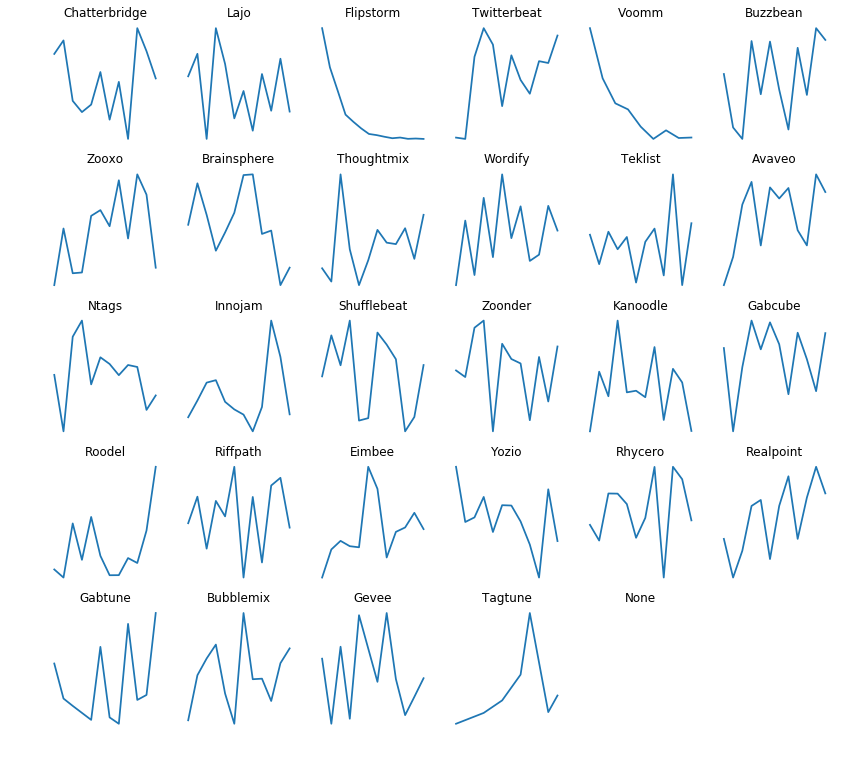

In [414]:
plot_revenue_trend(df['company'].unique(), 6, 5)

Looking at the plot above can be useful, but it would be nice to have a numeric method to get potentially troublesome companies. To do this, we look at the most recent quarter of revenue from a company, and raise a flag if this is less than 80% of the previous quarter's sales.

In [426]:
def get_revs(company):
    items = [i for i in quarter_values if i[0]==company]
    return [i[3] for i in items if i[3] is not None]

In [427]:
drop_threshold = 0.8
problem_companies = [c for c in df['company'].unique() if get_revs(c)[-1] < drop_threshold * sum(get_revs(c))/len(get_revs(c))]
problem_companies

['Flipstorm', 'Voomm', 'Innojam', 'Kanoodle']

---
## Part 5: Performance
Your boss is very impressed with what you have achieved in less than two weeks, and he would like to take your idea of storing the customer and sales data in a relational database to production. However, John is concerned that the solution will not scale. His experience is telling him that you will see many occurrences of the following queries.

- Show all sales to company X between time $t_1$ and time $t_2$
- Show the latest X sales in the database
- Show total sales per company per day

Show that Johns concern is not justified.

---
### Solution

---